# Unsupervised models project for Machine Learning

*Filip Jovanović*

Required
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

- Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

- Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

- Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

- Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

- A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

- Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

## About the data
Text and dataset taken from [Kaggle](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

- About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

- Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Main objectives
Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Data analysis:

In [53]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import DBSCAN, MeanShift, KMeans, estimate_bandwidth
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

After we imported all the needed libraries we can conduct short data analysis.

In [54]:
data = pd.read_csv('data/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


We can import the dictionary of the data to get a better explanation of dataset columns and respective values present in those columns. 

In [55]:
data_dict = pd.read_csv('data/data-dictionary.csv')
for index, row in data_dict.iterrows():
    print(index, '->',row.values[0], ':', row.values[1])

0 -> country : Name of the country
1 -> child_mort : Death of children under 5 years of age per 1000 live births
2 -> exports : Exports of goods and services per capita. Given as %age of the GDP per capita
3 -> health : Total health spending per capita. Given as %age of GDP per capita
4 -> imports : Imports of goods and services per capita. Given as %age of the GDP per capita
5 -> Income : Net income per person
6 -> Inflation : The measurement of the annual growth rate of the Total GDP
7 -> life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
8 -> total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.
9 -> gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.


In [56]:
df = data.copy()
df = df.drop(columns=['country'])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [57]:
df.isna().value_counts().reset_index(drop=True)

0    167
dtype: int64

In [58]:
df.duplicated().value_counts()

False    167
dtype: int64

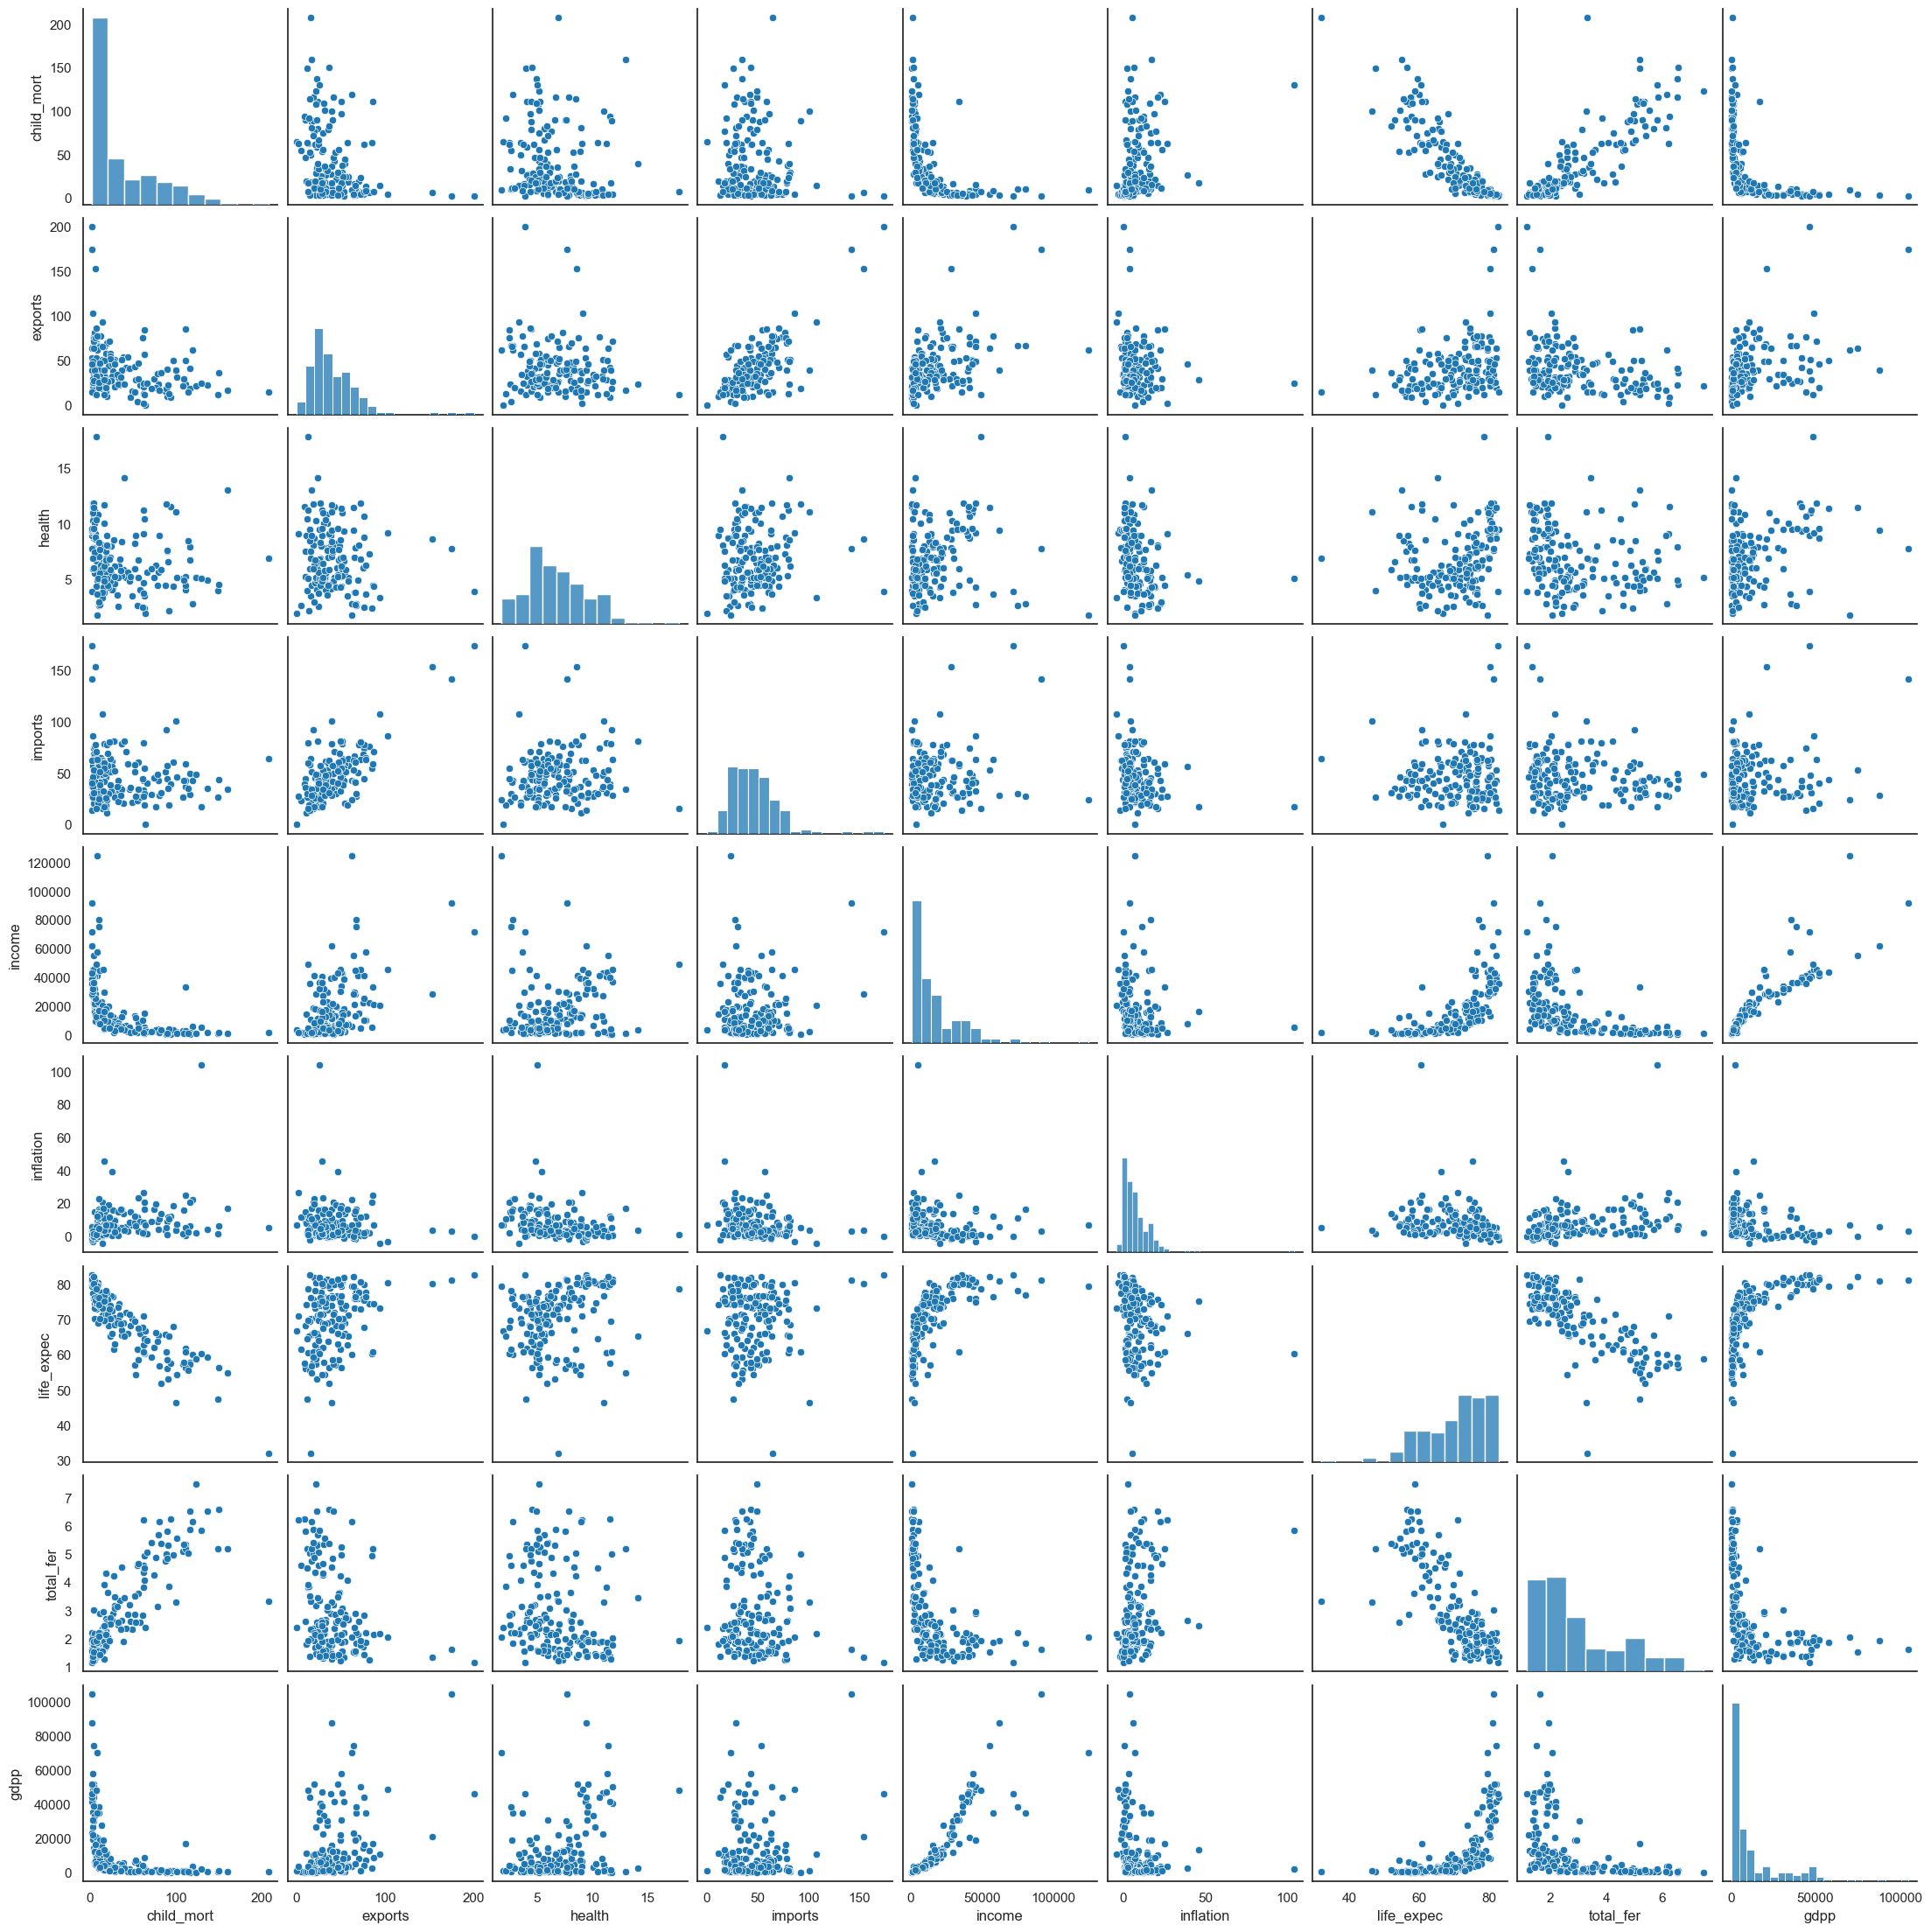

In [59]:
sns.pairplot(data=df)

<AxesSubplot:>

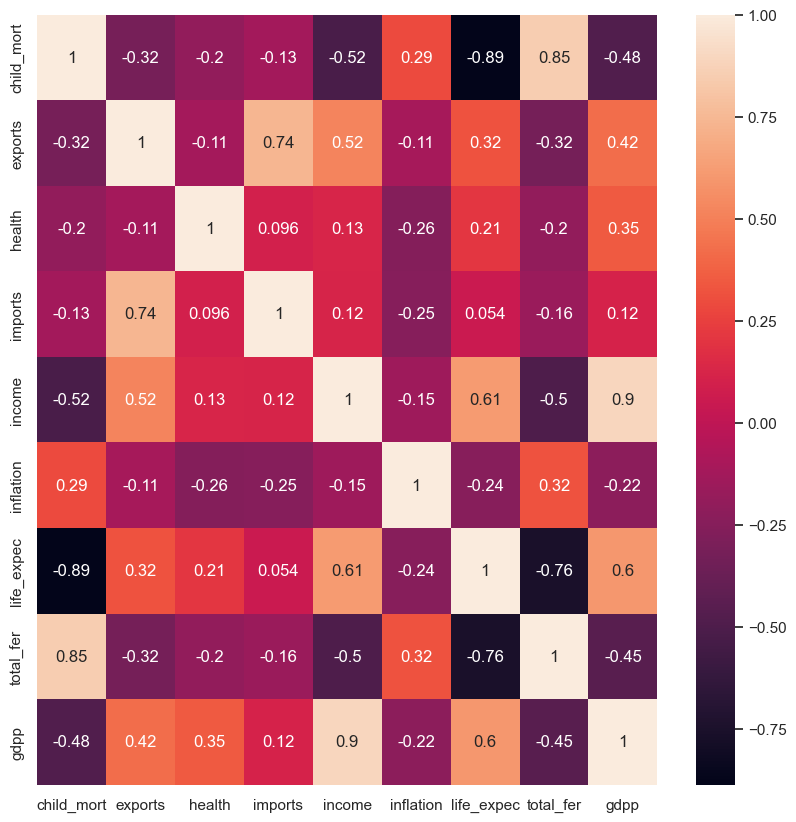

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Our `pairplot` shows us the distribution of all our columns and their corresponding distributions relative to the other columns.

The `heatmap` above shows correlation factors of our dataset and we can deduct that mostly all of them are quite high (their absolute values are, because we don't care if the correlation factor is negative or positive).  

In [61]:
df.skew().sort_values(ascending=False)

inflation     5.154049
exports       2.445824
income        2.231480
gdpp          2.218051
imports       1.905276
child_mort    1.450774
total_fer     0.967092
health        0.705746
life_expec   -0.970996
dtype: float64

Given the skewness of our data above, we can safely say that we will need to `log` or `sqrt` transform our data, and when looking in our data set values we see that they are not on the same scale, so before implementing our unsupervised models and after we transform the data we need to scale it.

In [62]:
df_log = np.log1p(df)
df_log_ss = StandardScaler().fit_transform(df_log)
df_log_ss = pd.DataFrame(df_log_ss)

for ind, col in enumerate(df.columns):
    df_log_ss.rename(columns={ind : col}, inplace=True)
    
df_log_ss.isna().value_counts().reset_index(drop=True)

0    163
1      4
dtype: int64

We have 4 missing values in `inflation` column, it is probably due to `log` transformation pushing them to the infinity. We will replace them with 0.

After we do that we can see that our skew values are better but not perfect (we are not aiming for perfection).

In [63]:
df_log_ss.fillna(0, inplace=True)
df_log_ss.skew().sort_values(ascending=False)

total_fer     0.540171
child_mort    0.066160
gdpp          0.006548
health       -0.230272
income       -0.235823
exports      -1.088961
inflation    -1.315647
life_expec   -1.626466
imports      -1.822794
dtype: float64

In [64]:
df_log_ss.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.278012,-1.764313,0.434646,0.147868,-1.413035,0.565707,-1.581599,1.734817,-1.460301
1,-0.239708,-0.283872,0.076480,0.291835,0.071660,-0.048485,0.630850,-0.944336,-0.122835
2,0.198464,0.184161,-0.984056,-0.498946,0.285240,1.037243,0.649834,0.143564,-0.064916
3,1.531191,0.908223,-1.809687,0.065136,-0.353257,1.336981,-1.097012,1.872702,-0.221309
4,-0.648481,0.437193,-0.123376,0.642228,0.605586,-0.823427,0.678219,-0.472520,0.608135


## Unsupervised models 

In this section of the project we will focus on clustering models to group countries by, for example, income and GDPP or other metrics. We will use 2 examples for each of KMeans and MeanShift models, where KMeans will help us visualise groupings of our countries based on two related feature columns like health and life expectancy columns. MeanShift is going to be handy in visualising in 3D centroids of groups using 3 of our feature columns.

At the end of our implementation of clustering models wee will use PCA to see how dimensionality reduction can help us lower the data needed to explain the majority of dataset variance.    

### Kmeans 

Note: one colored plots present data as it was given and multicolored plots present the grouped clusters after using specified model.

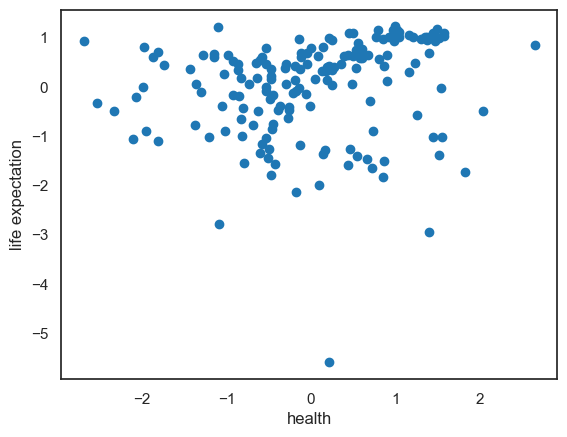

In [65]:
X = df_log_ss[['health', 'life_expec']]
plt.scatter(X['health'], X['life_expec'])
plt.xlabel('health')
plt.ylabel('life expectation')
plt.show()

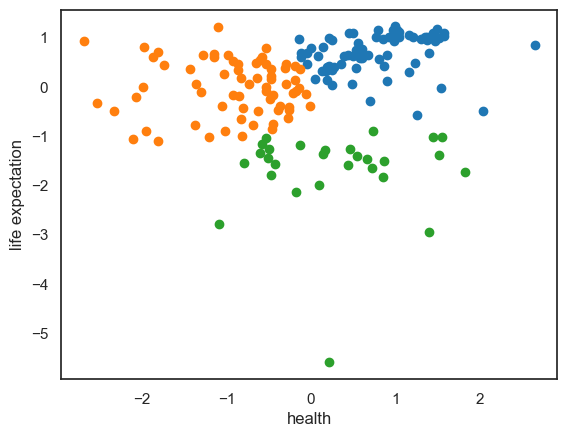

In [66]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['health'], X_['life_expec'], label=label)
plt.xlabel('health')
plt.ylabel('life expectation')
plt.show()

Using our first model to group countries into 3 clusters we can see it describes health and life expectancy fairly well. From this plot a conclusion can be formed: Not all countries with low population health will have low life expectancy.

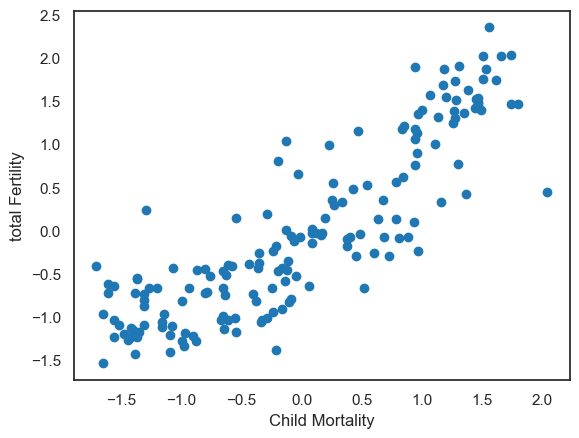

In [67]:
X = df_log_ss[['child_mort', 'total_fer']]
plt.scatter(X['child_mort'], X['total_fer'])
plt.xlabel('Child Mortality')
plt.ylabel('total Fertility')
plt.show()

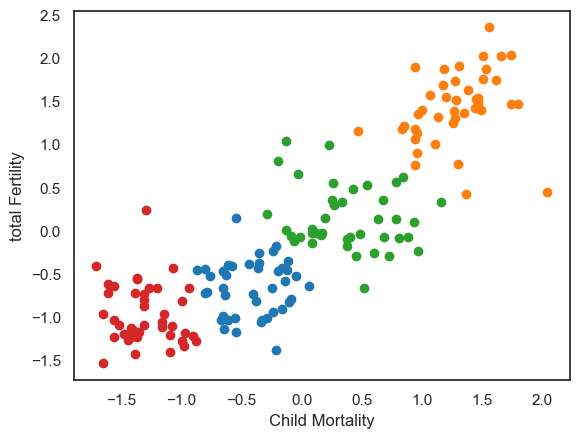

In [68]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(X)
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['child_mort'], X_['total_fer'], label=label)
plt.xlabel('Child Mortality')
plt.ylabel('total Fertility')
plt.show()

Using KMeans again, this time looking at the child mortality rate and total fertility rate, we can deduct from above plot that they are positively correlated and can be (4 was chosen number for groups) grouped into 4 clusters that represent the fact that in countries with low child mortality there is a low fertility rate and the more mortality raises the more children are born in general.  

### MeanShift

Note: plots with more dots present data from our dataset and plots with small number of dots present centroids of clusters after using MeanShift.

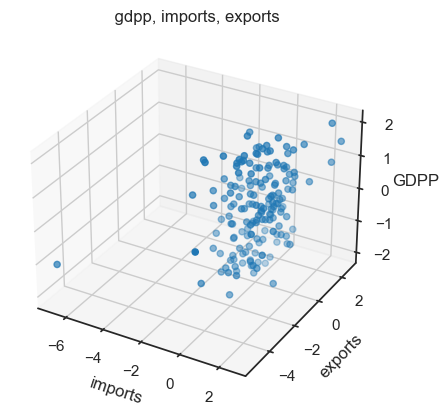

In [69]:
X = df_log_ss[['imports', 'exports', 'gdpp']]
ax = plt.axes(projection ="3d")
ax.scatter3D(X['imports'], X['exports'], X['gdpp'])
ax.set_title(' gdpp, imports, exports')
ax.set_xlabel('imports')
ax.set_ylabel('exports')
ax.set_zlabel('GDPP')
plt.show()

In [70]:
bandwidth = estimate_bandwidth(X, quantile=.06)

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=0.7935156619880736, bin_seeding=True)

In [71]:
centers = ms.cluster_centers_

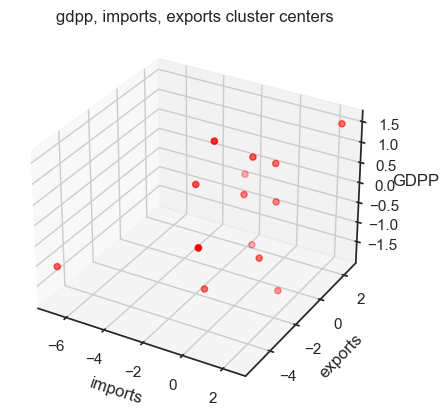

In [72]:
ax = plt.axes(projection ="3d")
ax.set_title('gdpp, imports, exports cluster centers')
ax.scatter3D(centers[:,0], centers[:,1], centers[:,2],color='red')
ax.set_xlabel('imports')
ax.set_ylabel('exports')
ax.set_zlabel('GDPP')
plt.show()

Using MeanShift to present centroids of clusters when looking at country import, export and GDPP values we see our model created groups that point towards conclusion that (generally) having low import and export percentage leads to low GDPP.

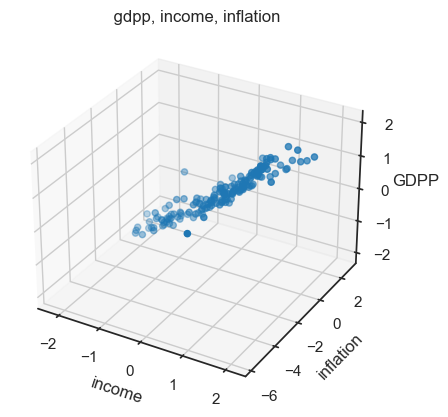

In [73]:
X = df_log_ss[['income', 'inflation', 'gdpp']]
ax = plt.axes(projection ="3d")
ax.scatter3D( X['income'], X['inflation'], X['gdpp'])
ax.set_title(' gdpp, income, inflation')
ax.set_xlabel('income')
ax.set_ylabel('inflation')
ax.set_zlabel('GDPP')
plt.show()

In [74]:
bandwidth = estimate_bandwidth(X, quantile=.06)

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=0.6257498848514392, bin_seeding=True)

In [75]:
centers = ms.cluster_centers_

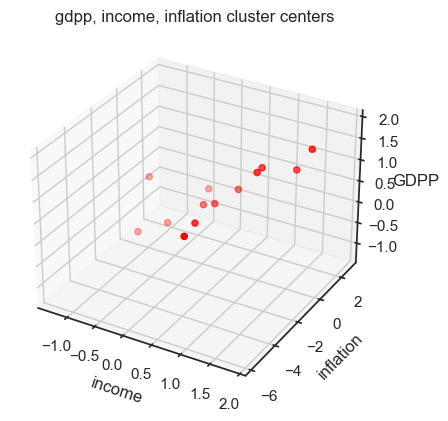

In [76]:
ax = plt.axes(projection ="3d")
ax.set_title('gdpp, income, inflation cluster centers')
ax.scatter3D(centers[:,0], centers[:,1], centers[:,2],color='red')
ax.set_xlabel('income')
ax.set_ylabel('inflation')
ax.set_zlabel('GDPP')
plt.show()

Grouping our income, inflation and GDPP like this we can see that the higher the income and the lower the inflation results in higher GDPP. These centroids present around 13 different groups ranging from the poorest to the richest country groups. 

### Dimensionality reduction - PCA

In this short section we can take a look how reducing the number of features (dimensions) we can still keep a big part of our data variance.

In [77]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 7):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df_log_ss)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n,
                               'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': df_log_ss.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.5344
2,PCA(n_components=2),0.702962
3,PCA(n_components=3),0.838418
4,PCA(n_components=4),0.907698
5,PCA(n_components=5),0.94817
6,PCA(n_components=6),0.976812


We fit the PCA model 6 times each time increasing the number of components we want. We see that hitting a 90% explained variance is possible only using 4 components, reducing dimensionality of our data from 9 to only 4. If we need more precise variance explanation we can use 5 or even 6 components.  

Text(0.5, 0, 'number of features')

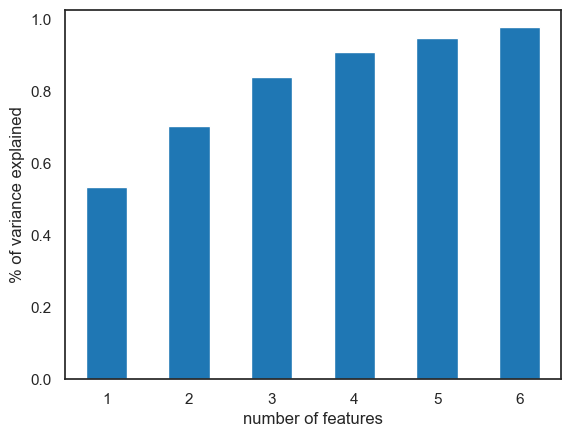

In [78]:
pca_df['var'].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('% of variance explained')
plt.xlabel('number of features')

Graph shows the increase in explained variance as the number of components increase.

## Key findings

Using only simple models in this project we saw that we can group countries by their financial state and by their health metrics like general health situation among all people, fertility rate and mortality rate and other.

Using KMeans and MeanShift resulted in 'easy to understand' data visualisation and clusters that are not difficult to understand and describe.

We see generally that the increase in one metric that is logically correlated with the other (like income and GDPP) we se the increase in the other. Where that is not the case we can then use our groupings to inspect what is the current situation in some countries and predict what could it be.

Dimensionality reduction was also shown to be a powerful tool of reducing the data and keeping most variance, which can be used for further data visualisation and model optimisation. 

## Conclusion

Generally KMeans is the best model to cluster combinations of feature columns in this dataset because of high correlation values between most of the columns. And on top of that it gives the simplest representation of country groups given the known data. 

Using clustering algorithms (models) results in easily interpretable data that can be used to build more efficient prediction models and dimensionality reduction can help us decrease computing power needed to make predictions making our future models faster and more optimised.

## Next steps

Next steps could include:
1. Using more clustering models to describe the country groupings in even more detail
2. Using more complex or just different dimensionality reduction methods like KernelPCA
3. Implementing prediction models on one of our feature columns